In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import scipy
import sklearn
import math

In [2]:
def match_list(A,B):
    C= set(A).intersection(set(B))
    print(len(set(A)),len(set(B)),len(C))
    #return C

def icdf(dct):
	'''
		Simple function to compute an inverse cumulative density distribution from 
		a dictionary. 
	'''
	count = np.zeros(max(dct.values())+1)
    

	for k in dct:
		count[dct[k]] = count[dct[k]] + 1
	
	for i in reversed(range(len(count)-1)):
		count[i] = count[i] + count[i+1]
	
	count = count / count[0]

	return count

def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y%m%d")
    d2 = datetime.strptime(d2, "%Y%m%d")
    return abs((d2 - d1).days)

def days_between_h(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

def remove_duplicate(df, column):
    dup = df[df.duplicated()]
    print("duplicates",dup.shape)
    df.drop_duplicates(subset = column, keep = False, inplace = True)
    return df

def remove_duplicates(df):
    dup = df[df.duplicated()]
    print("duplicates",dup.shape)
    df.drop_duplicates(subset = None, keep = False, inplace = True)
    return df

def normalize_year17(A, num):
    X=[0]*(len(num))
    for i in range(0,len(num)):
        A[i] = A[i]/num[i]
        X[i]=2001+i
    return X, A

def no_normalize_year17(A, num):
    X=[0]*(len(num))
    for i in range(0,len(num)):
        X[i]=2001+i
    return X, A

def normalize_team(A, num):
    X=[0]*(len(num))
    for i in range(0,len(num)):
        A[i] = A[i]/num[i]
        X[i]=1+i
    return X, A

def Create_Array(Dict_1,Dict_2):
	'''
		Simple function to create arrays from two dictionaries with same project keys. 
	'''
	X = np.zeros(len(Dict_1))
	Y = np.zeros(len(Dict_2))
	i = 0
	for p in Dict_1.keys():
		X[i] = Dict_1[p]
		Y[i] = Dict_2[p] 
		i = i + 1   
	return X,Y 

# check the correlation
def check_correlation(D1, D2):
    size1 = len(D1)
    size2 = len(D2)
    new1 = dict()
    new2 = dict()
    if size1 < size2:
        for i in D1:
            if i in D2:
                new1[i] = D1[i]
                new2[i] = D2[i]
    else:
        for j in D2:
            if j in D1:
                new1[j] = D1[j]
                new2[j] = D2[j]
    X,Y = Create_Array(new1,new2)
    print("size: ", len(new1))
    print("Correlation: ",np.corrcoef(X, Y))
    return X, Y

def statistics(l):
    avg = sum(l)/len(l)
    m = max(l)
    n = min(l)
    return avg, m, n

# Application data

In [3]:
df_app_data=pd.read_csv('/kellogg/proj/smz6657/PAIR/application_data.csv')

/software/anaconda3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,6,8,9,17,18,19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_app_data.shape

(11125755, 29)

In [5]:
df_app_data.head()

,application_number,filing_date,invention_subject_matter,application_type,examiner_name_last,examiner_name_first,examiner_name_middle,examiner_id,examiner_art_unit,uspc_class,...,earliest_pgpub_date,wipo_pub_number,wipo_pub_date,patent_number,patent_issue_date,abandon_date,disposal_type,invention_title,small_entity_indicator,aia_first_to_file
0,61896874,2013-10-29,UTL,PROVSNL,None,None,None,NaN,NaN,NaN,...,NaN,NaN,NaN,None,NaN,NaN,PEND,VIDEO DISPLAY APPARATUS,0.0,0
1,62463588,2017-02-24,UTL,PROVSNL,None,None,None,NaN,NaN,NaN,...,NaN,NaN,NaN,None,NaN,NaN,PEND,MULTIPLE TIER ELEVATED LIGHT TRAIN,1.0,0
2,60518750,2003-11-10,?,PROVSNL,None,None,None,NaN,NaN,NaN,...,NaN,NaN,NaN,None,NaN,NaN,PEND,Maske zur verwendung in einer mikrolithographi...,0.0,0
3,PCT/US05/07314,2005-03-07,?,PCT,None,None,None,NaN,NaN,NaN,...,NaN,2.005087e+09,2005-09-22,None,NaN,NaN,PEND,OCCIPITAL AND CERVICAL STABILIZATION SYSTEMS A...,0.0,0
4,PCT/US07/08155,2007-04-02,?,PCT,None,None,None,NaN,1791,425,...,NaN,2.007121e+09,2007-10-25,None,NaN,NaN,PEND,COATED MOLDS AND RELATED METHODS AND COMPONENTS,0.0,0


In [6]:
df_app_data.drop(["file_location","file_location_date","earliest_pgpub_number"], axis = 1, inplace = True)

In [7]:
df_app_data.head()

,application_number,filing_date,invention_subject_matter,application_type,examiner_name_last,examiner_name_first,examiner_name_middle,examiner_id,examiner_art_unit,uspc_class,...,earliest_pgpub_date,wipo_pub_number,wipo_pub_date,patent_number,patent_issue_date,abandon_date,disposal_type,invention_title,small_entity_indicator,aia_first_to_file
0,61896874,2013-10-29,UTL,PROVSNL,None,None,None,NaN,NaN,NaN,...,NaN,NaN,NaN,None,NaN,NaN,PEND,VIDEO DISPLAY APPARATUS,0.0,0
1,62463588,2017-02-24,UTL,PROVSNL,None,None,None,NaN,NaN,NaN,...,NaN,NaN,NaN,None,NaN,NaN,PEND,MULTIPLE TIER ELEVATED LIGHT TRAIN,1.0,0
2,60518750,2003-11-10,?,PROVSNL,None,None,None,NaN,NaN,NaN,...,NaN,NaN,NaN,None,NaN,NaN,PEND,Maske zur verwendung in einer mikrolithographi...,0.0,0
3,PCT/US05/07314,2005-03-07,?,PCT,None,None,None,NaN,NaN,NaN,...,NaN,2.005087e+09,2005-09-22,None,NaN,NaN,PEND,OCCIPITAL AND CERVICAL STABILIZATION SYSTEMS A...,0.0,0
4,PCT/US07/08155,2007-04-02,?,PCT,None,None,None,NaN,1791,425,...,NaN,2.007121e+09,2007-10-25,None,NaN,NaN,PEND,COATED MOLDS AND RELATED METHODS AND COMPONENTS,0.0,0


In [8]:
df_app_data.drop(["examiner_name_last","examiner_name_first","examiner_name_middle","examiner_id","examiner_art_unit","uspc_class","uspc_subclass","confirm_number","customer_number","atty_docket_number"], axis = 1, inplace = True)

In [9]:
df_app_data.head()

,application_number,filing_date,invention_subject_matter,application_type,appl_status_code,appl_status_date,earliest_pgpub_date,wipo_pub_number,wipo_pub_date,patent_number,patent_issue_date,abandon_date,disposal_type,invention_title,small_entity_indicator,aia_first_to_file
0,61896874,2013-10-29,UTL,PROVSNL,159.0,2014-11-02,NaN,NaN,NaN,None,NaN,NaN,PEND,VIDEO DISPLAY APPARATUS,0.0,0
1,62463588,2017-02-24,UTL,PROVSNL,159.0,2018-02-25,NaN,NaN,NaN,None,NaN,NaN,PEND,MULTIPLE TIER ELEVATED LIGHT TRAIN,1.0,0
2,60518750,2003-11-10,?,PROVSNL,159.0,2004-11-14,NaN,NaN,NaN,None,NaN,NaN,PEND,Maske zur verwendung in einer mikrolithographi...,0.0,0
3,PCT/US05/07314,2005-03-07,?,PCT,218.0,2010-03-24,NaN,2.005087e+09,2005-09-22,None,NaN,NaN,PEND,OCCIPITAL AND CERVICAL STABILIZATION SYSTEMS A...,0.0,0
4,PCT/US07/08155,2007-04-02,?,PCT,19.0,2007-04-06,NaN,2.007121e+09,2007-10-25,None,NaN,NaN,PEND,COATED MOLDS AND RELATED METHODS AND COMPONENTS,0.0,0


In [10]:
df_app_data.drop(["earliest_pgpub_date","aia_first_to_file"], axis = 1, inplace = True)

In [11]:
df_app_data.shape

(11125755, 14)

In [12]:
#df_app = df_app_data.loc[(df_app_data.invention_subject_matter == "UTL") & (df_app_data.application_type != "PROVSNL")]
df_app = df_app_data.loc[(df_app_data.invention_subject_matter == "UTL")]

In [13]:
df_app.shape

(9074685, 14)

In [14]:
def check_types(df_app):
    app_id_ls = list(df_app['application_number'].apply(str))
    sub_matter_ls = list(df_app['invention_subject_matter'].apply(str))
    app_type = list(df_app['application_type'].apply(str))
    
    count_ut=0
    pct =0
    types = []
    print("total: ",len(app_id_ls))
    for i in range(0, len(app_id_ls)):
        appid = app_id_ls[i]
        sub = sub_matter_ls[i]
        kind = app_type[i]
        if kind not in types:
            types.append(kind)
        if kind == "PCT":
            pct+=1

    print(count_ut)
    #print(count_dp)
    #print(count_no)
    print("pct/prov", pct)
    print(types)


In [15]:
check_types(df_app)

total:  9074685
0
pct/prov 0
['PROVSNL', 'REGULAR', 'REISSUE', 'REEXAM', '?']


In [14]:
df_app.head()

,application_number,filing_date,invention_subject_matter,application_type,appl_status_code,appl_status_date,wipo_pub_number,wipo_pub_date,patent_number,patent_issue_date,abandon_date,disposal_type,invention_title,small_entity_indicator
8,05959772,NaN,UTL,REGULAR,NaN,NaN,NaN,NaN,None,NaN,NaN,PEND,?,0.0
10,05944830,1978-09-18,UTL,REGULAR,150.0,2001-09-19,NaN,NaN,4165318,1979-08-21,NaN,ISS,FORMALDEHYDE STABILIZED COATING COMPOSITIONS,0.0
11,06011268,1979-02-12,UTL,REGULAR,150.0,2001-09-22,NaN,NaN,4266228,1981-05-05,NaN,ISS,CIRCULARLY POLARIZED CROSSED SLOT WAVEGUIDE AN...,0.0
12,05828178,NaN,UTL,REGULAR,NaN,NaN,NaN,NaN,None,NaN,NaN,PEND,?,0.0
13,05828179,NaN,UTL,REGULAR,NaN,NaN,NaN,NaN,None,NaN,NaN,PEND,?,0.0


In [16]:
#df_app_reg = df_app.loc[(df_app.application_type == "REGULAR")]
df_app_reg = df_app

In [17]:
df_app_reg.shape

(9074685, 14)

In [18]:
dup = df_app_reg[df_app_reg.duplicated()]
dup.shape

(0, 14)

In [19]:
#id-date dictionary
def create_app_date_dict(df):
    '''This makes dictionary with only the patents that are filed after 2000'''
    
    app_id_ls = list(df['application_number'].apply(str))
    app_date_ls = list(df['filing_date'].apply(str))
    app_date_dict = dict()
    count =0
    for i in range(0,len(app_id_ls)):
        appid = app_id_ls[i]
        date = app_date_ls[i]
        count+=1
        if date!= "nan":
            d = datetime.strptime(date, "%Y-%m-%d").year
            if d > 2000:
                app_date_dict[appid] = date
        
    return app_date_dict

In [20]:
app_date_dict = create_app_date_dict(df_app_reg)

In [21]:
#not all of the apps have dates with them
len(app_date_dict)

6277115

In [22]:
def count_app_per_year(app_date):
    app_year = [0]*17
    for i in app_date:
        date = app_date[i]
        d = datetime.strptime(date, "%Y-%m-%d").year
        yr = d-2000
        yr = yr%18
        app_year[yr-1] = app_year[yr-1]+1
    return app_year
        
        
print(count_app_per_year(app_date_dict))
print(sum(count_app_per_year(app_date_dict)))

[270358, 276111, 280496, 297121, 313386, 343625, 371844, 378123, 356265, 383165, 404203, 432415, 460608, 465150, 458571, 446073, 339601]
6277115


# # Small vs Big entity

In [55]:
def compute_small_entity_year(df):
    app_date_dict = create_app_date_dict(df)
    
    app_ent_ls = list(df['small_entity_indicator'].apply(str))
    app_id_ls = list(df['application_number'].apply(str))
    small_ent =[0]*17
    big_ent = [0]*17
    num = [0]*17
    date_types =[]
    types =[]
    
    for i in range(0, len(app_ent_ls)):
        ent = app_ent_ls[i]
        if ent != "nan":
            appid = app_id_ls[i]
            has_ent =0
            ent = float(ent)


            if appid in app_date_dict:
                has_ent =1
                d = datetime.strptime(app_date_dict[appid], "%Y-%m-%d").year
                d = d-2000
                yr = d%18 # we have till 2017
                if ent == 1.0:
                    small_ent[yr-1] = small_ent[yr-1]+1
                elif ent == 0.0:
                    big_ent[yr-1] = big_ent[yr-1]+1
                else:
                    if ent not in types:
                        types.append(ent)
                if has_ent == 1:
                    num[yr-1]=num[yr-1]+1 
                
            
    print(types)
    print(date_types)
    return small_ent, big_ent, num 
    

In [56]:
small_ent, big_ent, num  = compute_small_entity_year(df_app_reg)

[]
[]


In [25]:
print(small_ent)
print(big_ent)
print(num)
print(sum(num))

[56924, 70477, 71091, 74001, 76277, 77887, 80430, 77063, 73913, 80375, 81951, 85172, 88460, 91889, 90024, 89431, 82308]
[211365, 203364, 206954, 220444, 234181, 246499, 253269, 250324, 228009, 240467, 255868, 274294, 284957, 289259, 288478, 285382, 243023]
[268289, 273841, 278045, 294445, 310458, 324386, 333699, 327387, 301922, 320842, 337819, 359466, 373417, 381148, 378502, 374813, 325331]
5563810


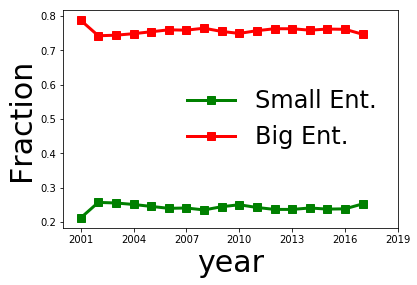

In [26]:
def plot_app_entity_per_year(X,Y1,Y2):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='Small Ent.')
    plt.plot(X, Y2, '-rs', linewidth=3, markersize=8, label='Big Ent.')
    ax.set_ylabel('Fraction', fontsize=30)
    ax.set_xlabel('year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2018, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2020, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y1 = normalize_year17(small_ent, num)
X, Y2 = normalize_year17(big_ent, num)
plot_app_entity_per_year(X,Y1,Y2)

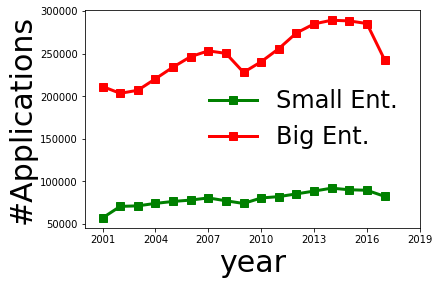

In [27]:
def plot_app_entity_num_per_year(X,Y1,Y2):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='Small Ent.')
    plt.plot(X, Y2, '-rs', linewidth=3, markersize=8, label='Big Ent.')
    ax.set_ylabel('#Applications', fontsize=30)
    ax.set_xlabel('year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2018, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2020, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y1 = normalize_year17(small_ent, num)
X, Y2 = normalize_year17(big_ent, num)
Y1= [56924, 70477, 71091, 74001, 76277, 77887, 80430, 77063, 73913, 80375, 81951, 85172, 88460, 91889, 90024, 89431, 82308]
Y2 = [211365, 203364, 206954, 220444, 234181, 246499, 253269, 250324, 228009, 240467, 255868, 274294, 284957, 289259, 288478, 285382, 243023]
plot_app_entity_num_per_year(X,Y1,Y2)

In [28]:
def compute_disposal_dict(df):
    app_date_dict = create_app_date_dict(df)
    
    app_dis_ls = list(df['disposal_type'].apply(str))
    app_id_ls = list(df['application_number'].apply(str))
    iss_date_ls = list(df['patent_issue_date'].apply(str))
    abn_date_ls = list(df['abandon_date'].apply(str))
    
    app_status_dict = dict()
    app_status_date_dict = dict()
    
    types = []
    for i in range(0, len(app_dis_ls)):
        dis = app_dis_ls[i]
        appid = app_id_ls[i]
        iss_date = iss_date_ls[i]
        abn_date = abn_date_ls[i]
       
        

        if appid in app_date_dict:
            
            if dis == "ISS":
                if appid not in app_status_dict:
                    app_status_dict[appid] = [dis]
                    app_status_date_dict[appid] = [iss_date]
                else:
                    app_status_dict[appid].append(dis)
                    app_status_date_dict[appid].append(iss_date)
                    
            elif dis == "ABN":
                if appid not in app_status_dict:
                    app_status_dict[appid] = [dis]
                    app_status_date_dict[appid] = [abn_date]
                else:
                    app_status_dict[appid].append(dis)
                    app_status_date_dict[appid].append(abn_date)
                    
            elif dis=="PEND":
                if appid not in app_status_dict:
                    app_status_dict[appid] = [dis]
                    app_status_date_dict[appid] = ['']
                else:
                    app_status_dict[appid].append(dis)
                    app_status_date_dict[appid].append('')
                
            else:
                if dis not in types:
                    types.append(dis)
            
                
            
    print(types)
    
    return app_status_dict, app_status_date_dict
    

In [29]:
app_status_dict, app_status_date_dict = compute_disposal_dict(df_app_reg)

[]


In [117]:
for i in app_status_dict:
    if len(app_status_dict[i])==1:
        print(app_status_dict[i])

['ABN']
['PEND']
['PEND']
['PEND']
['PEND']
['PEND']
['PEND']
['PEND']
['PEND']
['PEND']
['PEND']
['ABN']
['PEND']
['ABN']
['PEND']
['PEND']
['PEND']
['PEND']
['ABN']
['PEND']
['PEND']
['PEND']
['PEND']
['PEND']
['PEND']
['ABN']
['ABN']
['ABN']
['PEND']
['ABN']
['PEND']
['ABN']
['ABN']
['PEND']
['PEND']
['PEND']
['ABN']
['ABN']
['PEND']
['PEND']
['PEND']
['PEND']
['PEND']
['ABN']
['ABN']
['PEND']
['ABN']
['PEND']
['PEND']
['ABN']
['PEND']
['PEND']
['PEND']
['ABN']
['PEND']
['PEND']
['ABN']
['PEND']
['PEND']
['PEND']
['PEND']
['ABN']
['PEND']
['PEND']
['ABN']
['PEND']
['PEND']
['PEND']
['ABN']
['PEND']
['PEND']
['ABN']
['PEND']
['PEND']
['ABN']
['PEND']
['ABN']
['PEND']
['PEND']
['PEND']
['ABN']
['PEND']
['PEND']
['PEND']
['PEND']
['ABN']
['PEND']
['PEND']
['ABN']
['ABN']
['PEND']
['PEND']
['PEND']
['ABN']
['PEND']
['PEND']
['PEND']
['ABN']
['ABN']
['ABN']
['ABN']
['PEND']
['ABN']
['ABN']
['PEND']
['PEND']
['ABN']
['PEND']
['ABN']
['PEND']
['ABN']
['PEND']
['ABN']
['ABN']
['PEND']
['PEN

KeyboardInterrupt: 

In [32]:
print(len(app_status_dict))

5649154


In [30]:
def compute_disposal_type_year(df):
    app_date_dict = create_app_date_dict(df)
    
    app_dis_ls = list(df['disposal_type'].apply(str))
    app_id_ls = list(df['application_number'].apply(str))
    iss = [0]*17
    abn = [0]*17
    pend = [0]*17
    na = [0]*17
    num = [0]*17
    types = []
    for i in range(0, len(app_dis_ls)):
        dis = app_dis_ls[i]
        
        appid = app_id_ls[i]
        has_ent =0
        

        if appid in app_date_dict:
            has_ent =1
            d = datetime.strptime(app_date_dict[appid], "%Y-%m-%d").year
            d = d-2000
            yr = d%18 # we have till 2017
            if dis == "ISS":
                iss[yr-1] = iss[yr-1]+1
            elif dis == "ABN":
                abn[yr-1] = abn[yr-1]+1
            elif dis=="PEND":
                pend[yr-1] = pend[yr-1]+1
            else:
                na[yr-1] = na[yr-1]+1
                if dis not in types:
                    types.append(dis)
            if has_ent == 1:
                num[yr-1]=num[yr-1]+1 
                
            
    print(types)
    
    return iss, abn, pend, na, num
    

In [31]:
iss,abn,pend, na, num = compute_disposal_type_year(df_app_reg)

[]


In [32]:
print(iss)
print(abn)
print(pend)
print(na)
print(num)
print(sum(num))

[198695, 199520, 194919, 195655, 197013, 200762, 209868, 213420, 205175, 220918, 232469, 250804, 258922, 253769, 217855, 130235, 33901]
[70163, 74987, 83959, 99700, 114338, 124407, 124338, 114118, 96598, 99418, 103645, 102700, 101836, 90497, 61945, 24844, 3457]
[157, 164, 189, 279, 403, 675, 1215, 1741, 2293, 3566, 5775, 10675, 23042, 50619, 112911, 233567, 297033]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[269015, 274671, 279067, 295634, 311754, 325844, 335421, 329279, 304066, 323902, 341889, 364179, 383800, 394885, 392711, 388646, 334391]
5649154


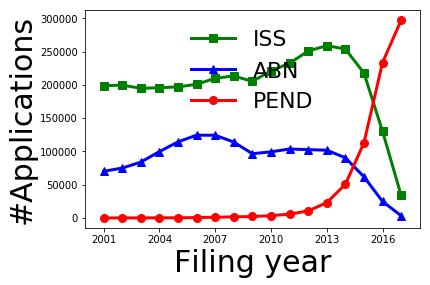

In [33]:
def plot_status_num_per_year(X,Y1,Y2,Y3):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='ISS')
    plt.plot(X, Y2, '-b^', linewidth=3, markersize=8, label='ABN')
    plt.plot(X, Y3, '-ro', linewidth=3, markersize=8, label='PEND')
    ax.set_ylabel('#Applications', fontsize=30)
    #ax.set_yscale('log')
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=22)
    plt.xlim(xmax = 2018, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2018, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y1 = no_normalize_year17(iss, num)
X, Y2 = no_normalize_year17(abn, num)
X, Y3 = no_normalize_year17(pend, num)
plot_status_num_per_year(X,Y1,Y2,Y3)

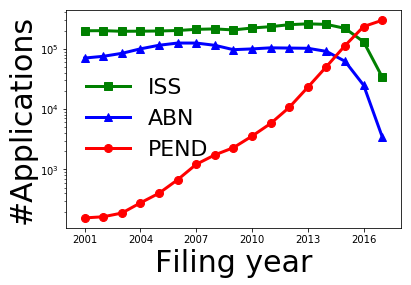

In [34]:
def plot_status_num_per_year(X,Y1,Y2,Y3):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='ISS')
    plt.plot(X, Y2, '-b^', linewidth=3, markersize=8, label='ABN')
    plt.plot(X, Y3, '-ro', linewidth=3, markersize=8, label='PEND')
    ax.set_ylabel('#Applications', fontsize=30)
    ax.set_yscale('log')
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=22)
    plt.xlim(xmax = 2018, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2018, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y1 = no_normalize_year17(iss, num)
X, Y2 = no_normalize_year17(abn, num)
X, Y3 = no_normalize_year17(pend, num)
plot_status_num_per_year(X,Y1,Y2,Y3)

In [45]:
df_app_reg.head()

,application_number,filing_date,invention_subject_matter,application_type,appl_status_code,appl_status_date,patent_number,patent_issue_date,abandon_date,disposal_type,invention_title,small_entity_indicator,aia_first_to_file
8,05959772,NaN,UTL,REGULAR,NaN,NaN,None,NaN,NaN,PEND,?,0.0,0
10,05944830,1978-09-18,UTL,REGULAR,150.0,2001-09-19,4165318,1979-08-21,NaN,ISS,FORMALDEHYDE STABILIZED COATING COMPOSITIONS,0.0,0
11,06011268,1979-02-12,UTL,REGULAR,150.0,2001-09-22,4266228,1981-05-05,NaN,ISS,CIRCULARLY POLARIZED CROSSED SLOT WAVEGUIDE AN...,0.0,0
12,05828178,NaN,UTL,REGULAR,NaN,NaN,None,NaN,NaN,PEND,?,0.0,0
13,05828179,NaN,UTL,REGULAR,NaN,NaN,None,NaN,NaN,PEND,?,0.0,0


# App Inventors

In [23]:
df_app_inv=pd.read_csv('/kellogg/proj/smz6657/PAIR/all_inventors.csv')

In [24]:
df_app_inv.head()

,application_number,inventor_name_first,inventor_name_middle,inventor_name_last,inventor_rank,inventor_region_code,inventor_country_code,inventor_country_name,inventor_address_type
0,5722601,THOMAS,E.,QUICK,1,KS,US,NaN,residence
1,5746998,DIVAKER,B.,KENKARE,1,NJ,US,NaN,residence
2,5713514,MICHAEL,W.,HOSTAD,1,IL,US,NaN,residence
3,5769323,MARION,L.,BROWN,1,MS,US,NaN,residence
4,5769512,ERNEST,L.,CHITWOOD,1,CA,US,NaN,residence


In [25]:
app_inv = list(df_app_inv['application_number'].apply(str))
print(len(app_inv))
print(len(set(app_inv)))

32804370
10098494


In [25]:
#null and duplicate check
df_app_inv['application_number'].isnull().values.any()

False

In [26]:
df_app_inv = remove_duplicates(df_app_inv)

duplicates (850, 9)


In [27]:
df_app_inv.shape

(32802706, 9)

In [28]:
def create_inventor_dict(df, df_app_reg):
    app_date_dict = create_app_date_dict(df_app_reg)
    app_id_ls = list(df['application_number'].apply(str))
    app_inv_fname = list(df['inventor_name_first'].apply(str))
    app_inv_lastname = list(df['inventor_name_last'].apply(str))
    app_inv_rank_ls = list(df['inventor_rank'].apply(str))
    
    app_inv_dict = dict()
    app_inv_rank_dict= dict()
    
    
    for i in range(0, len(app_id_ls)):
        
        appid = app_id_ls[i]
        fname = app_inv_fname[i]
        lname = app_inv_lastname[i]
        rank = app_inv_rank_ls[i]
       
        if appid in app_date_dict:
            full_name = fname+";"+lname
            if appid in app_inv_dict:
                if full_name not in app_inv_dict[appid]:
                    app_inv_dict[appid].append(full_name)
                    app_inv_rank_dict[appid].append(rank)
                
            else:
                app_inv_dict[appid] = [full_name]
                app_inv_rank_dict[appid] = [rank]
   
    
    return app_inv_dict, app_inv_rank_dict
    

In [29]:
app_inv_dict, app_inv_rank_dict = create_inventor_dict(df_app_inv,df_app_reg)

In [100]:
def maximum_rank(ls):
    el = 0
    #print(ls)
    for i in ls:
        if (el< int(i)):
            el = int(i)
    #print("maximum element ", el)
    return el
        
def rank_check(rank_dict):
    c =0
    wrong = 0
    mis = []
    for i in rank_dict:
        c=c+1
        size = len(rank_dict[i])
        el = maximum_rank(rank_dict[i])
        if (el != size):
            #print("something wrong :", i, " :",rank_dict[i])
            wrong= wrong+1
            mis.append(i)
    print(wrong)
    return mis

In [101]:
mismatch = rank_check(app_inv_rank_dict)

6498


In [30]:
len(app_inv_rank_dict)

6036720

In [31]:
def compute_app_inventor_years(df_app_reg, df_app_inv):
    
    app_date_dict = create_app_date_dict(df_app_reg)
    app_inv_dict, app_inv_rank_dict = create_inventor_dict(df_app_inv,df_app_reg)
    #mismatch = rank_check(app_inv_rank_dict)
    
    inv_year = [0]*17
    num = [0]*17
    
    app_id_ls = list(app_date_dict.keys())
    
    for i in range(0, len(app_id_ls)):
        appid = app_id_ls[i]
        #if appid not in mismatch: 
        d = datetime.strptime(app_date_dict[appid], "%Y-%m-%d").year
        d = d - 2000
        yr = d%18 # we have till 2017


        has_inv = 0
        if appid in app_inv_dict:
            num_inv = len(app_inv_dict[appid])
            inv_year[yr-1] = inv_year[yr-1] + num_inv
            has_inv = 1

        if has_inv == 1:
            num[yr-1]=num[yr-1]+1  
        
    return inv_year, num   

In [104]:
df_app_inv_small = df_app_inv.truncate( before = 1, after =500)

In [ ]:
app_inv_year, num = compute_app_inventor_years(df_app_reg, df_app_inv_small)

In [32]:
app_inv_year, num = compute_app_inventor_years(df_app_reg, df_app_inv)

In [33]:
print(app_inv_year)
print(num)
print(sum(num))

[88147, 683030, 703417, 749625, 793300, 877131, 961947, 983040, 934795, 1025376, 1091240, 1177265, 1264061, 1288321, 1288840, 1275117, 1002014]
[35043, 271588, 280295, 297043, 313311, 343563, 371820, 378112, 356253, 383149, 404195, 432400, 460597, 465135, 458559, 446064, 339593]
6036720


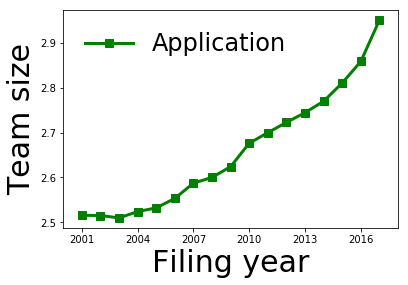

In [34]:
def plot_app_inv_per_year(X,Y):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y, '-gs', linewidth=3, markersize=8, label='Application')
    ax.set_ylabel('Team size', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2018, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2018, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, app_inv_year = normalize_year17(app_inv_year, num)
plot_app_inv_per_year(X,app_inv_year)

# App Status and Lifetime

In [49]:
def compute_status_date_dict(df):

    app_status_dict, app_status_date_dict = compute_disposal_dict(df)
    
    app_id_ls = list(df['application_number'].apply(str))
    status_date_ls = list(df['appl_status_date'].apply(str))

    status_date_dict = dict()
      
    for i in range(0, len(app_dis_ls)):
        
        appid = app_id_ls[i]
        date = status_date_ls[i]

        if appid in app_status_dict:
            dis = app_status_dict[appid]
            
            if dis == "ISS" or dis == "ABN":
                status_date_dict[appid] = date        
    
    return status_date_dict, app_status_dict

In [50]:
def lifetime_per_application(df):
    app_date_dict = create_app_date_dict(df)
    app_status_dict, app_status_date_dict = compute_disposal_dict(df)
    
    app_life_dict = dict()
    for i in app_date_dict:
        date_app_file = app_date_dict[i]
        date_app_status = app_status_date_dict[i][0]
        if date_app_status!='' and date_app_status!="nan":
            #print("date: ",date_app_status)
            time = days_between_h(date_app_status,date_app_file)
            #print(time)
            app_life_dict[i] = time
    return app_life_dict, app_status_dict

In [51]:
def compute_app_lifetime_years(df_app_reg):
    
    app_date_dict = create_app_date_dict(df_app_reg)
    app_life_dict, app_status_dict = lifetime_per_application(df_app_reg)
    
    
    iss_year = [0]*17
    abn_year = [0]*17
    num = [0]*17
    
    app_id_ls = list(app_date_dict.keys())
    
    for i in range(0, len(app_id_ls)):
        appid = app_id_ls[i]
       
        d = datetime.strptime(app_date_dict[appid], "%Y-%m-%d").year
        d = d - 2000
        yr = d%18 # we have till 2017


        has = 0
        if appid in app_life_dict:
            if app_status_dict[appid][0] == "ISS":
                time = app_life_dict[appid]
                iss_year[yr-1] = iss_year[yr-1] + time
                has = 1
                #print("here")
            if app_status_dict[appid][0] == "ABN":
                time = app_life_dict[appid]
                abn_year[yr-1] = abn_year[yr-1] + time
                has = 1
                #print("here2")
                
        if has == 1:
            num[yr-1]=num[yr-1]+1  
        
    return iss_year, abn_year, num   

In [126]:
df_app_reg_small = df_app_reg.truncate( before = 1, after =10000)

In [52]:
iss_year, abn_year, num = compute_app_lifetime_years(df_app_reg)

[]


In [53]:
print(iss_year)
print(abn_year)
print(num)
print(sum(num))

[204914423, 215926161, 229875787, 247621091, 258991513, 269969993, 282145535, 275945593, 247666646, 246782201, 241736200, 238730169, 234954506, 209030202, 152281301, 68738940, 11320383]
[77963363, 88646812, 107596011, 130613000, 149838897, 157903408, 155598507, 141003778, 114400829, 110117710, 106693402, 98034688, 92292418, 73067556, 41013186, 11589052, 879191]
[268858, 274507, 278878, 295354, 311350, 325167, 334205, 327538, 301773, 320336, 336114, 353504, 360756, 344266, 279800, 155079, 37358]
4904843


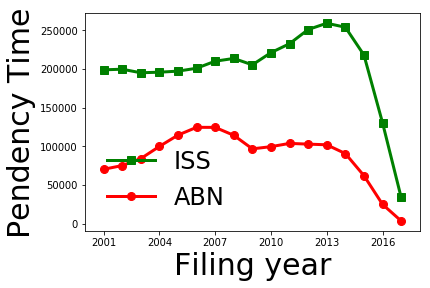

In [54]:
def plot_app_lifetime_per_year(X,Y1,Y2):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='ISS')
    plt.plot(X, Y2, '-ro', linewidth=3, markersize=8, label='ABN')
    ax.set_ylabel('Pendency Time', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2018, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2018, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

#X, Y1 = normalize_year17(iss_year, num)
#X, Y2 = normalize_year17(abn_year, num)
plot_app_lifetime_per_year(X,Y1,Y2)

# Status and Inventors

In [57]:
def compute_app_inventor_years(df_app_reg):
    
    app_date_dict = create_app_date_dict(df_app_reg)
    app_life_dict, app_status_dict = lifetime_per_application(df_app_reg)
    app_inv_dict, app_inv_rank_dict = create_inventor_dict(df_app_inv,df_app_reg)
    
    
    iss_year = [0]*17
    abn_year = [0]*17
    num_iss = [0]*17
    num_abn = [0]*17
    
    app_id_ls = list(app_date_dict.keys())
    
    for i in range(0, len(app_id_ls)):
        appid = app_id_ls[i]
       
        d = datetime.strptime(app_date_dict[appid], "%Y-%m-%d").year
        d = d - 2000
        yr = d%18 # we have till 2017


        has_iss = 0
        has_abn = 0
        if appid in app_life_dict and appid in app_inv_dict:
            if app_status_dict[appid][0] == "ISS":
                num_inv = len(app_inv_dict[appid])
                iss_year[yr-1] = iss_year[yr-1] + num_inv
                has_iss = 1
                #print("here")
            if app_status_dict[appid][0] == "ABN":
                num_inv = len(app_inv_dict[appid])
                abn_year[yr-1] = abn_year[yr-1] + num_inv
                has_abn = 1
                #print("here2")
                
        if has_abn == 1:
            num_abn[yr-1]=num_abn[yr-1]+1
            
        if has_iss == 1:
            num_iss[yr-1]=num_iss[yr-1]+1 
        
    return iss_year, abn_year, num_iss, num_abn   

In [58]:
iss_year, abn_year, num_iss, num_abn = compute_app_inventor_years(df_app_reg)

[]


In [59]:
print(iss_year)
print(abn_year)
print(num_iss)
print(sum(num_iss))
print("--------")
print(num_abn)
print(sum(num_abn))

[62910, 490929, 492834, 501685, 509645, 524423, 557980, 567283, 548541, 603915, 640966, 697606, 727353, 715433, 618860, 371757, 97358]
[23482, 188111, 206387, 243273, 278431, 307130, 309873, 285538, 243714, 255333, 269387, 265532, 265783, 235259, 159133, 65012, 9536]
[25286, 196541, 194829, 195632, 197006, 200758, 209865, 213420, 205175, 220917, 232469, 250802, 258920, 253769, 217855, 130235, 33901]
3237380
--------
[9130, 73472, 83894, 99678, 114322, 124397, 124323, 114110, 96593, 99412, 103640, 102691, 101829, 90489, 61939, 24838, 3451]
1428208


In [61]:
iss_year = [62910, 490929, 492834, 501685, 509645, 524423, 557980, 567283, 548541, 603915, 640966, 697606, 727353, 715433, 618860, 371757, 97358]
abn_year = [23482, 188111, 206387, 243273, 278431, 307130, 309873, 285538, 243714, 255333, 269387, 265532, 265783, 235259, 159133, 65012, 9536]

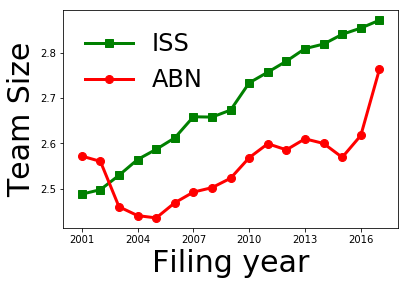

In [62]:
def plot_app_inventor_per_year(X,Y1,Y2):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='ISS')
    plt.plot(X, Y2, '-ro', linewidth=3, markersize=8, label='ABN')
    ax.set_ylabel('Team Size', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2018, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2018, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y1 = normalize_year17(iss_year, num_iss)
X, Y2 = normalize_year17(abn_year, num_abn)
plot_app_inventor_per_year(X,Y1,Y2)

# Continuity Parents

In [139]:
df_app_parent=pd.read_csv('/kellogg/proj/smz6657/PAIR/continuity_parents.csv')

/software/anaconda3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [140]:
df_app_parent.head()

,application_number,parent_application_number,parent_filing_date,continuation_type
0,4635952,4.53253e+06,1966-02-28,CIP
1,5085289,4.57832e+06,NaN,CON
2,5085289,4.63699e+06,NaN,CON
3,5134958,5.10188e+06,1970-12-28,CIP
4,5140541,4.66246e+06,NaN,REI


In [141]:
def compute_disposal_type_year(df_app_reg, df_app_parent):
    app_date_dict = create_app_date_dict(df_app_reg)
    
    app_type_ls = list(df_app_parent['continuation_type'].apply(str))
    app_id_ls = list(df_app_parent['application_number'].apply(str))
    cip = [0]*17
    con = [0]*17
    div = [0]*17
    
    num = [0]*17
    
    for i in range(0, len(app_id_ls)):
        dis = app_type_ls[i]
        
        appid = app_id_ls[i]
        has_ent =0
        

        if appid in app_date_dict:
            has_ent =1
            d = datetime.strptime(app_date_dict[appid], "%Y-%m-%d").year
            d = d-2000
            yr = d%18 # we have till 2017
            
            if dis == "CIP":
                cip[yr-1] = cip[yr-1]+1
                
            elif dis == "CON":
                con[yr-1] = con[yr-1]+1
                
            elif dis=="DIV":
                div[yr-1] = div[yr-1]+1
            else:
                na[yr-1] = na[yr-1]+1
                
            if has_ent == 1:
                num[yr-1]=num[yr-1]+1 
                
            
    #print(types)
    
    return cip, con, div, na, num

In [142]:
cip, con, div, na, num = compute_disposal_type_year(df_app_reg, df_app_parent)

In [143]:
print(cip)
print(con)
print(div)
print(na)
print(num)
print(sum(num))

[4532, 33687, 33038, 34765, 35786, 40078, 43508, 31368, 31110, 32111, 36430, 36183, 37515, 35974, 34896, 34668, 36916]
[4887, 48010, 40302, 42266, 45047, 49590, 56344, 48441, 49170, 60993, 76286, 94603, 103807, 111986, 118987, 132023, 154819]
[2845, 25071, 26560, 26325, 25485, 29083, 31551, 25176, 25325, 30921, 31102, 32408, 32752, 31802, 30073, 30608, 34009]
[14741, 161719, 108802, 120006, 132635, 149107, 163626, 165725, 163661, 188955, 200255, 209845, 232162, 246378, 242933, 244260, 261761]
[27005, 268487, 208702, 223362, 238953, 267858, 295029, 270710, 269266, 312980, 344073, 373039, 406236, 426140, 426889, 441559, 487505]
5287793


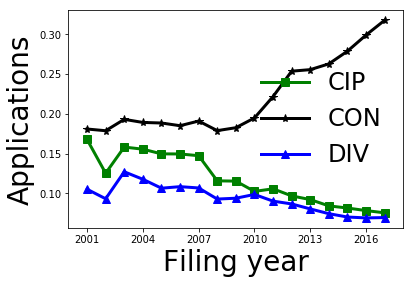

In [147]:
def plot_app_continuity_per_year(X,Y1,Y2,Y3,Y4):
   
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='CIP')
    plt.plot(X, Y2, '-k*', linewidth=3, markersize=8, label='CON')
    plt.plot(X, Y3, '-b^', linewidth=3, markersize=8, label='DIV')
    #plt.plot(X, Y4, '-ro', linewidth=3, markersize=8, label='Others')
    ax.set_ylabel('Applications', fontsize=28)
    ax.set_xlabel('Filing year', fontsize=28)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2018, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2018, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

#X, Y1 = normalize_year17(cip, num)
#X, Y2 = normalize_year17(con, num)
#X, Y3 = normalize_year17(div, num)
#X, Y4 = normalize_year17(na, num)
plot_app_continuity_per_year(X,Y1,Y2,Y3,Y4)